In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = np.load('X.npy')
Y = np.load('Y.npy')

In [6]:
from sklearn.preprocessing import LabelEncoder
Y = LabelEncoder().fit_transform(Y)

In [7]:
X = X.astype('float32')
y = Y.astype('int64')

In [8]:
X /= 255.0

In [11]:
X.min(), X.max()

(0.0, 1.0)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
X_train.shape, y_train.shape

((52933, 1024), (52933,))

In [16]:
def plot_example(X, y):
    """Plot the first 5 images and their labels in a row."""
    for i, (img, y) in enumerate(zip(X[:5].reshape(5, 32, 32), y[:5])):
        plt.subplot(151 + i)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.title(y)

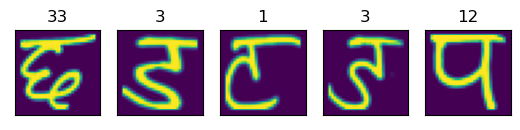

In [17]:
plot_example(X_train, y_train)

In [18]:


import torch
from torch import nn
import torch.nn.functional as F



In [19]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [30]:
mnist_dim = X.shape[1]
hidden_dim = int(mnist_dim/4)
output_dim = len(np.unique(Y))

In [31]:
mnist_dim, hidden_dim, output_dim

(1024, 256, 36)

In [32]:
class ClassifierModule(nn.Module):
    def __init__(
            self,
            input_dim=mnist_dim,
            hidden_dim=hidden_dim,
            output_dim=output_dim,
            dropout=0.5,
    ):
        super(ClassifierModule, self).__init__()
        self.dropout = nn.Dropout(dropout)

        self.hidden = nn.Linear(input_dim, hidden_dim)
        self.output = nn.Linear(hidden_dim, output_dim)

    def forward(self, X, **kwargs):
        X = F.relu(self.hidden(X))
        X = self.dropout(X)
        X = F.softmax(self.output(X), dim=-1)
        return X

In [33]:
from skorch import NeuralNetClassifier

In [34]:
torch.manual_seed(0)

net = NeuralNetClassifier(
    ClassifierModule,
    max_epochs=40,
    lr=0.1,
    device=device,
)

In [35]:
net.fit(X_train, y_train);

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        2.2869       0.6398        1.4529  0.9333
      2        1.4512       0.6952        1.1772  1.0133
      3        1.2450       0.7339        1.0200  1.2544
      4        1.1078       0.7687        0.8954  0.9528
      5        1.0014       0.7900        0.8039  0.9577
      6        0.9201       0.8116        0.7251  0.9611
      7        0.8510       0.8247        0.6732  1.0323
      8        0.7978       0.8353        0.6239  1.4237
      9        0.7587       0.8441        0.5905  1.1363
     10        0.7174       0.8523        0.5590  1.0902
     11        0.6942       0.8586        0.5351  1.1595
     12        0.6557       0.8638        0.5100  1.1264
     13        0.6387       0.8661        0.4949  0.9487
     14        0.6173       0.8722        0.4760  0.9867
     15        0.5953       0.8743        0.4594  0.9703
     16        0.5810       0.8

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
y_pred = net.predict(X_test)

In [38]:
accuracy_score(y_test, y_pred)

0.910172853499575

In [39]:
error_mask = y_pred != y_test

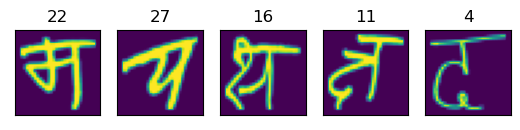

In [40]:
plot_example(X_test[error_mask], y_pred[error_mask])  #SOME BAD PREDICTION

# CNN